In [2]:
import yfinance as yf
import vectorbt as vbt
import numpy as np
import matplotlib.pyplot as plt
import datetime
vbt.settings.set_theme('dark')
plt.style.use('dark_background')

In [18]:

tickers = yf.Ticker("^GSPC")
SPX = tickers.history(start='2000-01-01',end='2024-09-20', interval='1d')
print(SPX)

                                  Open         High          Low        Close  \
Date                                                                            
2000-01-03 00:00:00-05:00  1469.250000  1478.000000  1438.359985  1455.219971   
2000-01-04 00:00:00-05:00  1455.219971  1455.219971  1397.430054  1399.420044   
2000-01-05 00:00:00-05:00  1399.420044  1413.270020  1377.680054  1402.109985   
2000-01-06 00:00:00-05:00  1402.109985  1411.900024  1392.099976  1403.449951   
2000-01-07 00:00:00-05:00  1403.449951  1441.469971  1400.729980  1441.469971   
...                                ...          ...          ...          ...   
2024-09-13 00:00:00-04:00  5603.339844  5636.270020  5601.649902  5626.020020   
2024-09-16 00:00:00-04:00  5615.209961  5636.049805  5604.529785  5633.089844   
2024-09-17 00:00:00-04:00  5655.509766  5670.810059  5614.049805  5634.580078   
2024-09-18 00:00:00-04:00  5641.680176  5689.750000  5615.080078  5618.259766   
2024-09-19 00:00:00-04:00  5

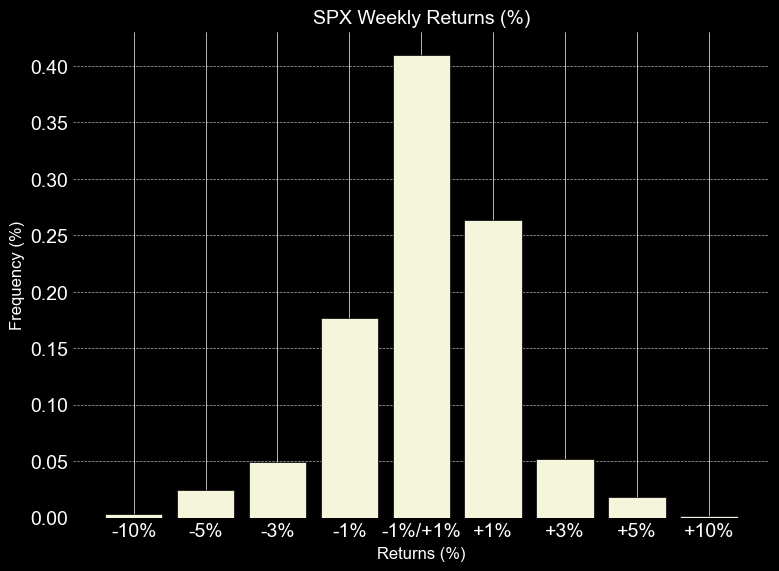

In [120]:
#Calcul stat return weekly
return_weekly = ( SPX['Close'] - SPX['Open']) * 100 / SPX['Close']

return_map = {
    '-10%': 0,
    '-5%': 0,
    '-3%': 0,
    '-1%' : 0,
    '-1%/+1%': 0,
    '+1%' : 0,
    '+3%': 0,
    '+5%': 0,
    '+10%': 0
}

def classify_return(ret):
    if ret <= -10:
        return '-10%'
    elif -10 < ret <= -5:
        return '-5%'
    elif -5 < ret <= -3:
        return '-3%'
    elif -3 < ret <= -1:
        return '-1%'
    elif -1 < ret < 1:
        return '-1%/+1%'
    elif 1 <= ret < 3:
        return '+1%'
    elif 3 <= ret < 5:
        return '+3%'
    elif 5 <= ret < 10:
        return '+5%'
    else:
        return '+10%'


for ret in return_weekly:
    interval = classify_return(ret)
    return_map[interval] += 1

total_returns = len(return_weekly)
for key in return_map:
    return_map[key] /= total_returns

intervals = list(return_map.keys())
frequencies = list(return_map.values())


plt.figure(figsize=(8, 6))
bars = plt.bar(intervals, frequencies, color='beige', edgecolor='black')


plt.title('SPX Weekly Returns (%)', fontsize=14)
plt.xlabel('Returns (%)', fontsize=12)
plt.ylabel('Frequency (%)', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)


plt.show()


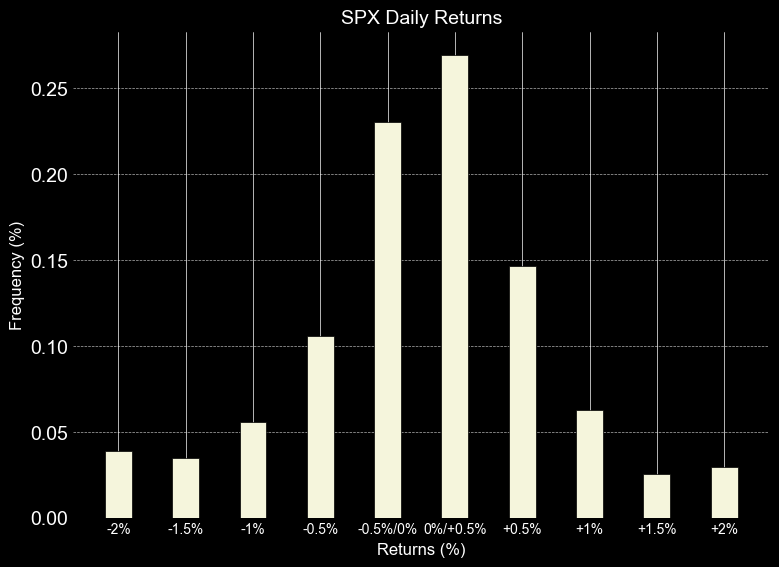

In [106]:


#Calcul stat return daily
return_daily = ( SPX['Close'] - SPX['Open']) * 100 / SPX['Close']

return_map = {
    '-2%': 0,
    '-1.5%': 0,
    '-1%': 0,
    '-0.5%' : 0,
    '-0.5%/0%': 0,
    '0%/+0.5%' : 0,
    '+0.5%' : 0,
    '+1%': 0,
    '+1.5%': 0,
    '+2%': 0
}

def classify_return(ret):
    if ret <= -2:
        return '-2%'
    elif -2 < ret <= -1.5:
        return '-1.5%'
    elif -1.5 < ret <= -1:
        return '-1%'
    elif -1 < ret <= -0.5:
        return '-0.5%'
    elif -0.5 < ret <= 0:
        return '-0.5%/0%'
    elif 0 < ret < 0.5:
        return '0%/+0.5%'
    elif 0.5 <= ret < 1:
        return '+0.5%'
    elif 1 <= ret < 1.5:
        return '+1%'
    elif 1.5 <= ret < 2:
        return '+1.5%'
    else:
        return '+2%'


for ret in return_daily:
    interval = classify_return(ret)
    return_map[interval] += 1

total_returns = len(return_daily)
for key in return_map:
    return_map[key] /= total_returns

intervals = list(return_map.keys())
frequencies = list(return_map.values())


x_pos = np.arange(len(intervals))  
spacing = 1
plt.figure(figsize=(8, 6))

bars = plt.bar(x_pos * (1 + spacing), frequencies, color='beige', edgecolor='black')

plt.xticks(x_pos * (1 + spacing), intervals,fontsize=10)


plt.title('SPX Daily Returns', fontsize=14)
plt.xlabel('Returns (%)', fontsize=12)
plt.ylabel('Frequency (%)', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)


plt.show()

In [20]:
# Partie sur la volatilité et stats descriptives

tickers = yf.Ticker("^VIX")
VIX = tickers.history(start='2000-01-01',end='2024-09-20', interval='1d')
print(VIX)


                                Open       High        Low      Close  Volume  \
Date                                                                            
2000-01-03 00:00:00-06:00  24.360001  26.150000  23.980000  24.209999       0   
2000-01-04 00:00:00-06:00  24.940001  27.180000  24.799999  27.010000       0   
2000-01-05 00:00:00-06:00  27.980000  29.000000  25.850000  26.410000       0   
2000-01-06 00:00:00-06:00  26.680000  26.709999  24.700001  25.730000       0   
2000-01-07 00:00:00-06:00  25.139999  25.170000  21.719999  21.719999       0   
...                              ...        ...        ...        ...     ...   
2024-09-13 00:00:00-05:00  17.030001  17.180000  16.230000  16.559999       0   
2024-09-16 00:00:00-05:00  17.160000  17.690001  16.910000  17.139999       0   
2024-09-17 00:00:00-05:00  17.160000  18.080000  16.670000  17.610001       0   
2024-09-18 00:00:00-05:00  17.580000  19.389999  17.110001  18.230000       0   
2024-09-19 00:00:00-05:00  1

In [21]:

#Volatiltié sur les jours down 



SPX['Return'] = SPX['Close'].pct_change()
day_down = SPX[SPX['Return'] < 0]
common_dates = VIX.index.intersection(day_down.index)
volat_down_day = VIX.loc[day_down.index, 'Open']


print(volat_down_day)


KeyError: "None of [DatetimeIndex(['2000-01-04 00:00:00-05:00', '2000-01-11 00:00:00-05:00',\n               '2000-01-12 00:00:00-05:00', '2000-01-18 00:00:00-05:00',\n               '2000-01-20 00:00:00-05:00', '2000-01-21 00:00:00-05:00',\n               '2000-01-24 00:00:00-05:00', '2000-01-26 00:00:00-05:00',\n               '2000-01-27 00:00:00-05:00', '2000-01-28 00:00:00-05:00',\n               ...\n               '2024-08-20 00:00:00-04:00', '2024-08-22 00:00:00-04:00',\n               '2024-08-26 00:00:00-04:00', '2024-08-28 00:00:00-04:00',\n               '2024-08-29 00:00:00-04:00', '2024-09-03 00:00:00-04:00',\n               '2024-09-04 00:00:00-04:00', '2024-09-05 00:00:00-04:00',\n               '2024-09-06 00:00:00-04:00', '2024-09-18 00:00:00-04:00'],\n              dtype='datetime64[ns, America/New_York]', name='Date', length=2884, freq=None)] are in the [index]"

In [17]:

#Ici on prend les valeurs du VIX 

volat_down_day_annualized = volat_down_day / np.sqrt(252)
median_volat = volat_down_day_annualized.median()

mean_volat = volat_down_day_annualized.mean()

std_volat = volat_down_day_annualized.std()

min_volat = volat_down_day_annualized.min()

max_volat = volat_down_day_annualized.max()



plt.figure(figsize=(8, 6))

stat_value=[median_volat,mean_volat,std_volat,min_volat,max_volat]
stat_label=['mediane','moyenne','ecart-type','min','max']

bars = plt.barh(stat_label,stat_value,color="beige", edgecolor='black')

for bar, stat in zip(bars, stat_value):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{stat/100:.2%}', 
             va='center', ha='left', fontsize=10, color='white', fontweight='bold')

plt.title("Stat descriptives de la volatiltié sur les jours down",fontsize=14)

plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.show





NameError: name 'volat_down_day' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

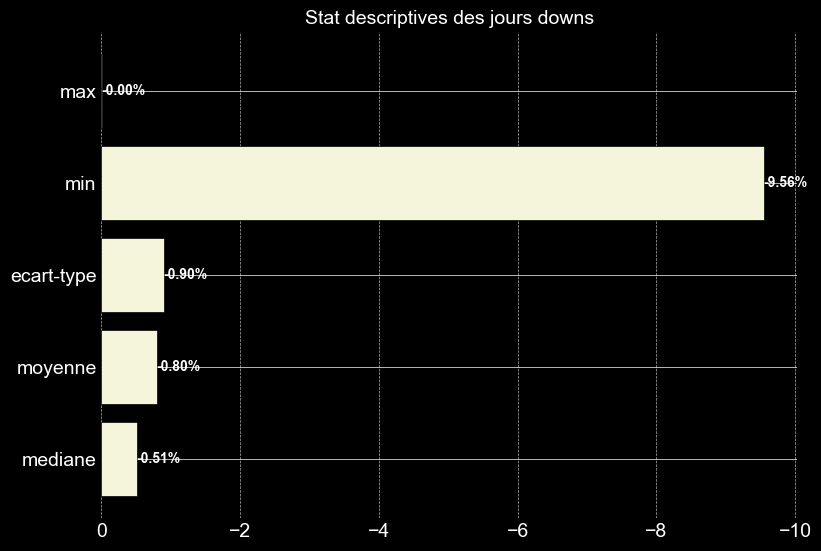

In [167]:
#Stat descirptive sur les jours de baisse

return_daily = ( SPX['Close'] - SPX['Open']) * 100 / SPX['Close']


return_daily_down = return_daily[return_daily < 0]

median_volat_down = return_daily_down.median()

mean_volat_down = return_daily_down.mean()

std_volat_down = return_daily_down.std() * -1

min_volat_down = return_daily_down.min()

max_volat_down = return_daily_down.max()

plt.figure(figsize=(8, 6))

stat_value=[median_volat_down,mean_volat_down,std_volat_down,min_volat_down,max_volat_down]
stat_label=['mediane','moyenne','ecart-type','min','max']

bars = plt.barh(stat_label,stat_value,color="beige", edgecolor='black')

for bar, stat in zip(bars, stat_value):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{stat/100:.2%}', 
             va='center', ha='left', fontsize=10, color='white', fontweight='bold')

plt.gca().invert_xaxis()

plt.title("Stat descriptives des jours downs",fontsize=14)

plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

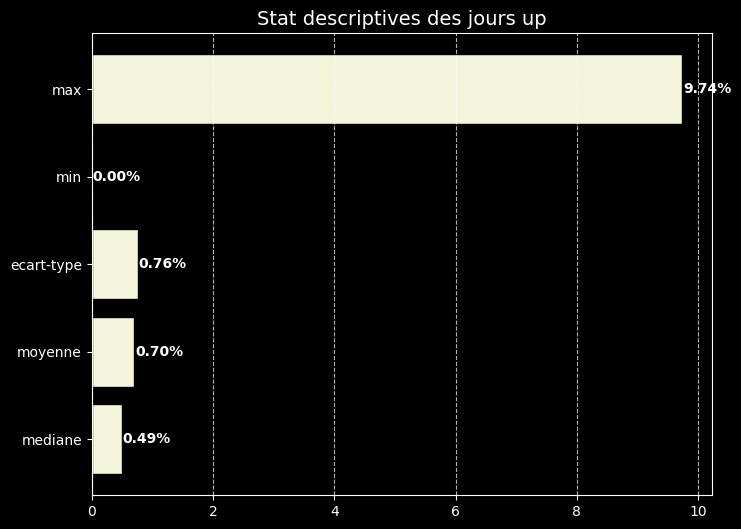

In [4]:
#Stat descirptive sur les jours de up

return_daily = ( SPX['Close'] - SPX['Open']) * 100 / SPX['Close']


return_daily_down = return_daily[return_daily > 0]

median_volat_up = return_daily_down.median()

mean_volat_up = return_daily_down.mean()

std_volat_up = return_daily_down.std() 

min_volat_up = return_daily_down.min()

max_volat_up = return_daily_down.max()

plt.figure(figsize=(8, 6))

stat_value=[median_volat_up,mean_volat_up,std_volat_up,min_volat_up,max_volat_up]
stat_label=['mediane','moyenne','ecart-type','min','max']

bars = plt.barh(stat_label,stat_value,color="beige", edgecolor='black')

for bar, stat in zip(bars, stat_value):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{stat/100:.2%}', 
             va='center', ha='left', fontsize=10, color='white', fontweight='bold')



plt.title("Stat descriptives des jours up",fontsize=14)

plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.show


In [5]:
#Venir traduire nos pourcentage en point d'indice / Le faire a chaque fois que tu veux venir utilser ce graph

data = yf.download("^GSPC", start=datetime.datetime.today().date())
current_index_value = data['Close'].iloc[-1] 

median_volat_up_ticks = (median_volat_up / 100) * current_index_value * 4
mean_volat_up_ticks = (mean_volat_up / 100) * current_index_value * 4
std_volat_up_ticks = (std_volat_up / 100) * current_index_value * 4
min_volat_up_ticks = (min_volat_up / 100) * current_index_value * 4
max_volat_up_ticks = (max_volat_up / 100) * current_index_value * 4

plt.figure(figsize=(8, 6))

stat_value=[median_volat_up_ticks,mean_volat_up_ticks,std_volat_up_ticks,min_volat_up_ticks,max_volat_up_ticks]
stat_label=['mediane','moyenne','ecart-type','min','max']

bars = plt.barh(stat_label,stat_value,color="beige", edgecolor='black')

for bar, stat in zip(bars, stat_value):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{int(stat)}', 
             va='center', ha='left', fontsize=10, color='white', fontweight='bold')



plt.title("Stat descriptives des jours up en ticks",fontsize=14)

plt.grid(True, axis='x', linestyle='--', alpha=0.7)




[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['^GSPC']: IndexError('index 0 is out of bounds for axis 0 with size 0')


IndexError: single positional indexer is out-of-bounds

In [13]:

#Demarche l'objectif et de calculer les ecart type sur ta journée puis de calculer les ecart type moyen puis ensuite de faire la moyenen des deux 
#Concernant les ecart type moyen il faut voir sur quel plage de data recup car prendre trop grand au final ca peut ne plus etre cohérent ... 

#SUR JOUR DE DOWN


start_date = (datetime.datetime.today() - datetime.timedelta(days=5)).date()


data_SPX = yf.download("^GSPC", start=start_date)
current_index_value = data_SPX['Close'].iloc[-1]


data_VIX = yf.download("^VIX", start=start_date)
current_VIX_value = data_VIX['Close'].iloc[-1]


current_VIX_value_annualised = current_VIX_value / np.sqrt(252)

std1 = current_VIX_value_annualised
std2 = std1 * 2
std3= std2 * 2


std1_average = mean_volat
std2_average = std1_average * 2
std3_average = std2_average * 2


std1_avr_global = (std1 + mean_volat ) / 2
std2_avr_global = std1_avr_global * 2
std3_avr_global = std2_avr_global * 2

print(std3_avr_global)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

5815.02978515625


NameError: name 'mean_volat' is not defined

In [ ]:
#Stat sur élasticité 

